In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
abp_data = pd.read_csv("/content/ABPn.csv")
ppg_data = pd.read_csv("/content/PPGn.csv")
ecg_data = pd.read_csv("/content/ECGn.csv")
sbp_data = pd.read_csv("/content/SBPn.csv")
dbp_data = pd.read_csv("/content/DBPn.csv")

In [ ]:
# Split data into features (PPG and ECG) and target variables (ABP, SBP, and DBP)
X_ppg = ppg_data.values
X_ecg = ecg_data.values
y_abp = abp_data.values
y_sbp = sbp_data.values
y_dbp = dbp_data.values


In [ ]:
# Normalize/Standardize input features
scaler = StandardScaler()
X_ppg = scaler.fit_transform(X_ppg)
X_ecg = scaler.fit_transform(X_ecg)

In [ ]:
# Split data into training, validation, and test sets
X_ppg_train, X_ppg_temp, X_ecg_train, X_ecg_temp, y_abp_train, y_abp_temp, y_sbp_train, y_sbp_temp, y_dbp_train, y_dbp_temp = train_test_split(
    X_ppg, X_ecg, y_abp, y_sbp, y_dbp, test_size=0.2, random_state=42)
X_ppg_val, X_ppg_test, X_ecg_val, X_ecg_test, y_abp_val, y_abp_test, y_sbp_val, y_sbp_test, y_dbp_val, y_dbp_test = train_test_split(
    X_ppg_temp, X_ecg_temp, y_abp_temp, y_sbp_temp, y_dbp_temp, test_size=0.5, random_state=42)

In [ ]:
print("X_ppg_train shape:", X_ppg_train.shape)
print("X_ecg_train shape:", X_ecg_train.shape)
print("y_abp_train shape:", y_abp_train.shape)
print("y_sbp_train shape:", y_sbp_train.shape)
print("y_dbp_train shape:", y_dbp_train.shape)
print("X_ppg_val shape:", X_ppg_val.shape)
print("X_ecg_val shape:", X_ecg_val.shape)
print("y_abp_val shape:", y_abp_val.shape)
print("y_sbp_val shape:", y_sbp_val.shape)
print("y_dbp_val shape:", y_dbp_val.shape)
print("X_ppg_test shape:", X_ppg_test.shape)
print("X_ecg_test shape:", X_ecg_test.shape)
print("y_abp_test shape:", y_abp_test.shape)
print("y_sbp_test shape:", y_sbp_test.shape)
print("y_dbp_test shape:", y_dbp_test.shape)

X_ppg_train shape: (799, 1024)
X_ecg_train shape: (799, 1024)
y_abp_train shape: (799, 1024)
y_sbp_train shape: (799, 1)
y_dbp_train shape: (799, 1)
X_ppg_val shape: (100, 1024)
X_ecg_val shape: (100, 1024)
y_abp_val shape: (100, 1024)
y_sbp_val shape: (100, 1)
y_dbp_val shape: (100, 1)
X_ppg_test shape: (100, 1024)
X_ecg_test shape: (100, 1024)
y_abp_test shape: (100, 1024)
y_sbp_test shape: (100, 1)
y_dbp_test shape: (100, 1)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

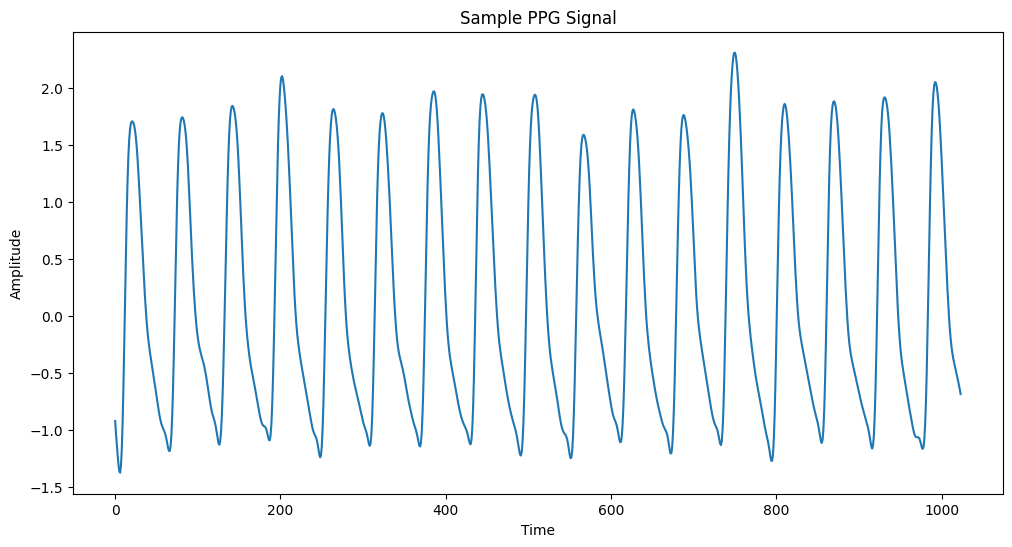

In [ ]:
# Visualize a sample PPG signal
sample_ppg = X_ppg[0, :]  # Replace with an index of your choice
plt.figure(figsize=(12, 6))
plt.plot(sample_ppg)
plt.title("Sample PPG Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


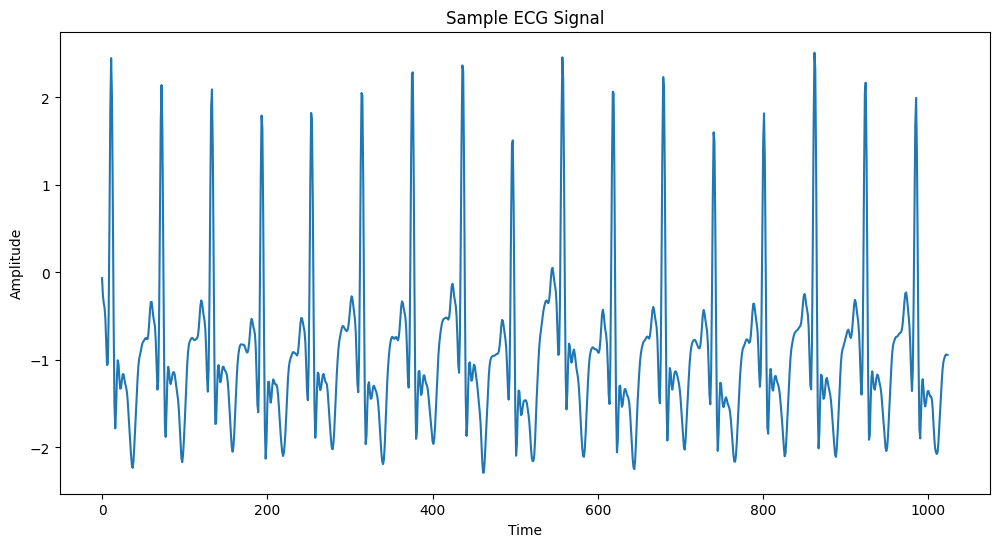

In [ ]:
# Visualize a sample ECG signal
sample_ecg = X_ecg[0, :]  # Replace with an index of your choice
plt.figure(figsize=(12, 6))
plt.plot(sample_ecg)
plt.title("Sample ECG Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

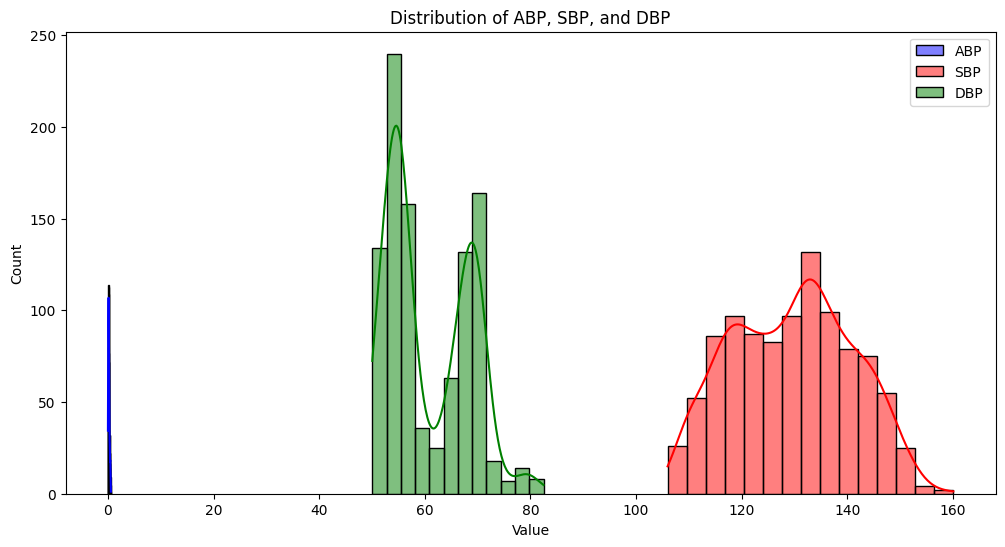

In [ ]:
# Visualize the distribution of target variables (e.g., ABP, SBP, DBP)
plt.figure(figsize=(12, 6))
sns.histplot(y_abp[:, 0], kde=True, color="blue", label="ABP")
sns.histplot(y_sbp[:, 0], kde=True, color="red", label="SBP")
sns.histplot(y_dbp[:, 0], kde=True, color="green", label="DBP")
plt.title("Distribution of ABP, SBP, and DBP")
plt.xlabel("Value")
plt.legend()
plt.show()

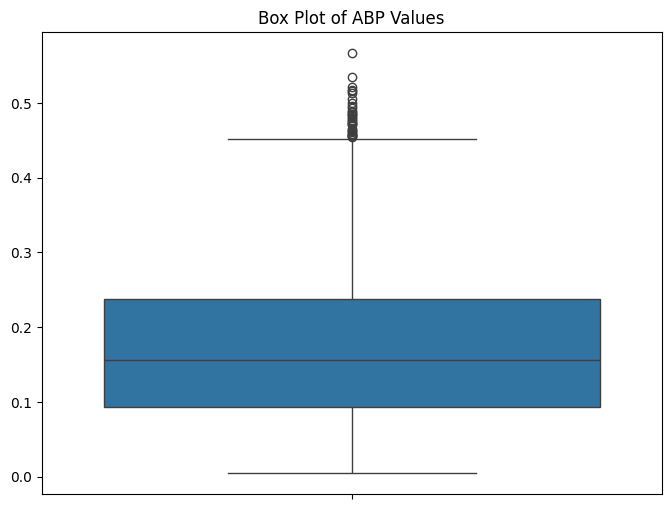

In [ ]:
# Box plot for ABP values
plt.figure(figsize=(8, 6))
sns.boxplot(y_abp[:, 0])
plt.title("Box Plot of ABP Values")
plt.show()


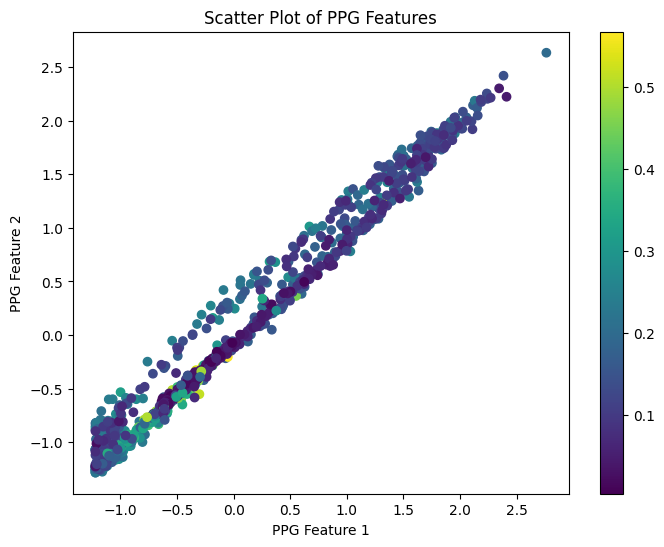

In [ ]:
# Example: Scatter plot of two PPG features
plt.figure(figsize=(8, 6))
plt.scatter(X_ppg[:, 0], X_ppg[:, 1], c=y_abp[:, 0], cmap='viridis')
plt.colorbar()
plt.xlabel("PPG Feature 1")
plt.ylabel("PPG Feature 2")
plt.title("Scatter Plot of PPG Features")
plt.show()



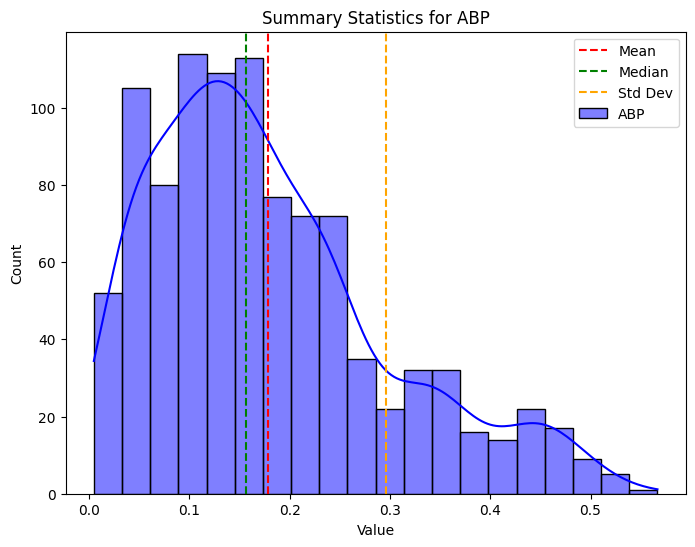

In [ ]:
# Example: Summary statistics for ABP values
mean_abp = np.mean(y_abp[:, 0])
median_abp = np.median(y_abp[:, 0])
std_abp = np.std(y_abp[:, 0])
plt.figure(figsize=(8, 6))
sns.histplot(y_abp[:, 0], kde=True, color="blue", label="ABP")
plt.axvline(mean_abp, color="red", linestyle="--", label="Mean")
plt.axvline(median_abp, color="green", linestyle="--", label="Median")
plt.axvline(mean_abp + std_abp, color="orange", linestyle="--", label="Std Dev")
plt.title("Summary Statistics for ABP")
plt.xlabel("Value")
plt.legend()
plt.show()


In [ ]:
pip install tensorflow

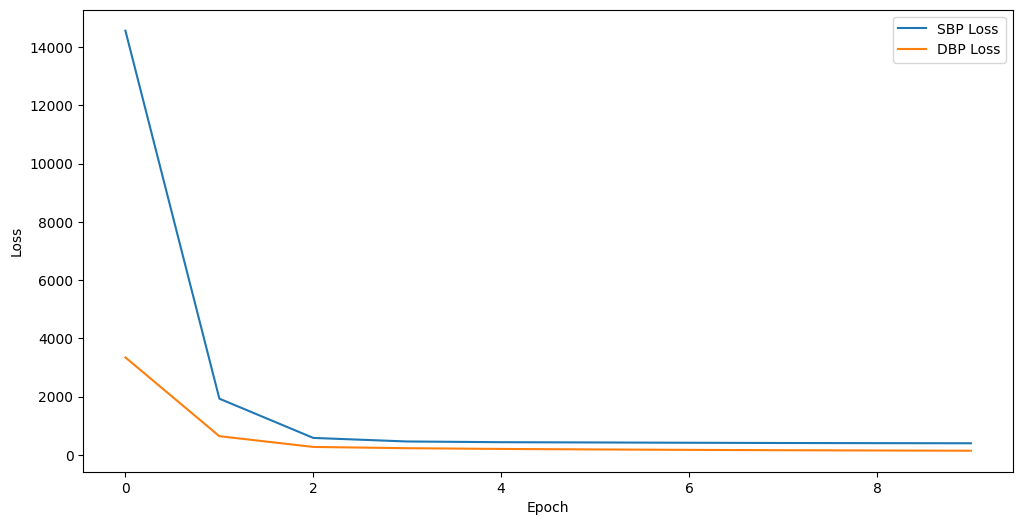

In [ ]:
# Visualize the training history
plt.figure(figsize=(12, 6))
#plt.plot(history.history['abp_output_loss'], label='ABP Loss')
plt.plot(history.history['sbp_output_loss'], label='SBP Loss')
plt.plot(history.history['dbp_output_loss'], label='DBP Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Attention, Dense, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load your data
abp_data = pd.read_csv("ABPn.csv")
ppg_data = pd.read_csv("PPGn.csv")
ecg_data = pd.read_csv("ECGn.csv")
sbp_data = pd.read_csv("SBPn.csv")
dbp_data = pd.read_csv("DBPn.csv")


In [ ]:
# Split data into features (PPG and ECG) and target variables (ABP, SBP, DBP)
X_ppg = ppg_data.values
X_ecg = ecg_data.values
y_abp = abp_data.values
y_sbp = sbp_data.values
y_dbp = dbp_data.values


In [ ]:
# Normalize/Standardize input features
scaler = StandardScaler()
X_ppg = scaler.fit_transform(X_ppg)
X_ecg = scaler.fit_transform(X_ecg)


In [ ]:
# Split data into training, validation, and test sets
X_ppg_train, X_ppg_temp, X_ecg_train, X_ecg_temp, y_abp_train, y_abp_temp, y_sbp_train, y_sbp_temp, y_dbp_train, y_dbp_temp = train_test_split(
    X_ppg, X_ecg, y_abp, y_sbp, y_dbp, test_size=0.2, random_state=42)
X_ppg_val, X_ppg_test, X_ecg_val, X_ecg_test, y_abp_val, y_abp_test, y_sbp_val, y_sbp_test, y_dbp_val, y_dbp_test = train_test_split(
    X_ppg_temp, X_ecg_temp, y_abp_temp, y_sbp_temp, y_dbp_temp, test_size=0.5, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Attention, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback

# Define a custom callback to print losses during training
class LossCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1} - Total Loss: {logs['loss']:.4f}, ABP Loss: {logs['abp_output_loss']:.4f}, SBP Loss: {logs['sbp_output_loss']:.4f}, DBP Loss: {logs['dbp_output_loss']:.4f}")

# Define the input shapes for PPG and ECG data
ppg_input = Input(shape=(1024, 1), name="ppg_input")
ecg_input = Input(shape=(1024, 1), name="ecg_input")

# Initialize a list to hold LSTM and Attention layers
layers = []

# Create 6 pairs of Bi-directional LSTM and Attention layers with additional dense layers
for _ in range(6):
    # Bi-directional LSTM layer
    lstm = Bidirectional(LSTM(32, return_sequences=True))
    ppg_lstm = lstm(ppg_input)
    ecg_lstm = lstm(ecg_input)

    # Attention layer
    attention = Attention()
    ppg_attention = attention([ppg_lstm, ecg_lstm])
    ecg_attention = attention([ecg_lstm, ppg_lstm])

    # Additional dense layers for improved feature extraction
    ppg_attention = Dense(64, activation="relu")(ppg_attention)
    ecg_attention = Dense(64, activation="relu")(ecg_attention)

    # Append the layers to the list
    layers.extend([ppg_lstm, ecg_lstm, ppg_attention, ecg_attention])

# Concatenate the outputs of all LSTM and Attention layers
combined = Concatenate(axis=-1)(layers)

# Add more dense layers for further feature extraction
combined = Dense(128, activation="relu")(combined)
combined = Dropout(0.5)(combined)

# Create an output layer for ABP prediction
abp_output = Dense(1, name="abp_output")(combined)

# Create an output layer for SBP prediction
sbp_output = Dense(1, name="sbp_output")(combined)

# Create an output layer for DBP prediction
dbp_output = Dense(1, name="dbp_output")(combined)

# Create the model
model = Model(inputs=[ppg_input, ecg_input], outputs=[abp_output, sbp_output, dbp_output])

# Compile the model with appropriate loss functions and metrics for each output
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={"abp_output": "mean_squared_error", "sbp_output": "mean_squared_error", "dbp_output": "mean_squared_error"},
    metrics={"abp_output": "mae", "sbp_output": "mae", "dbp_output": "mae"}
)

# Display the model summary
#model.summary()

# Custom callback to print losses during training
loss_callback = LossCallback()



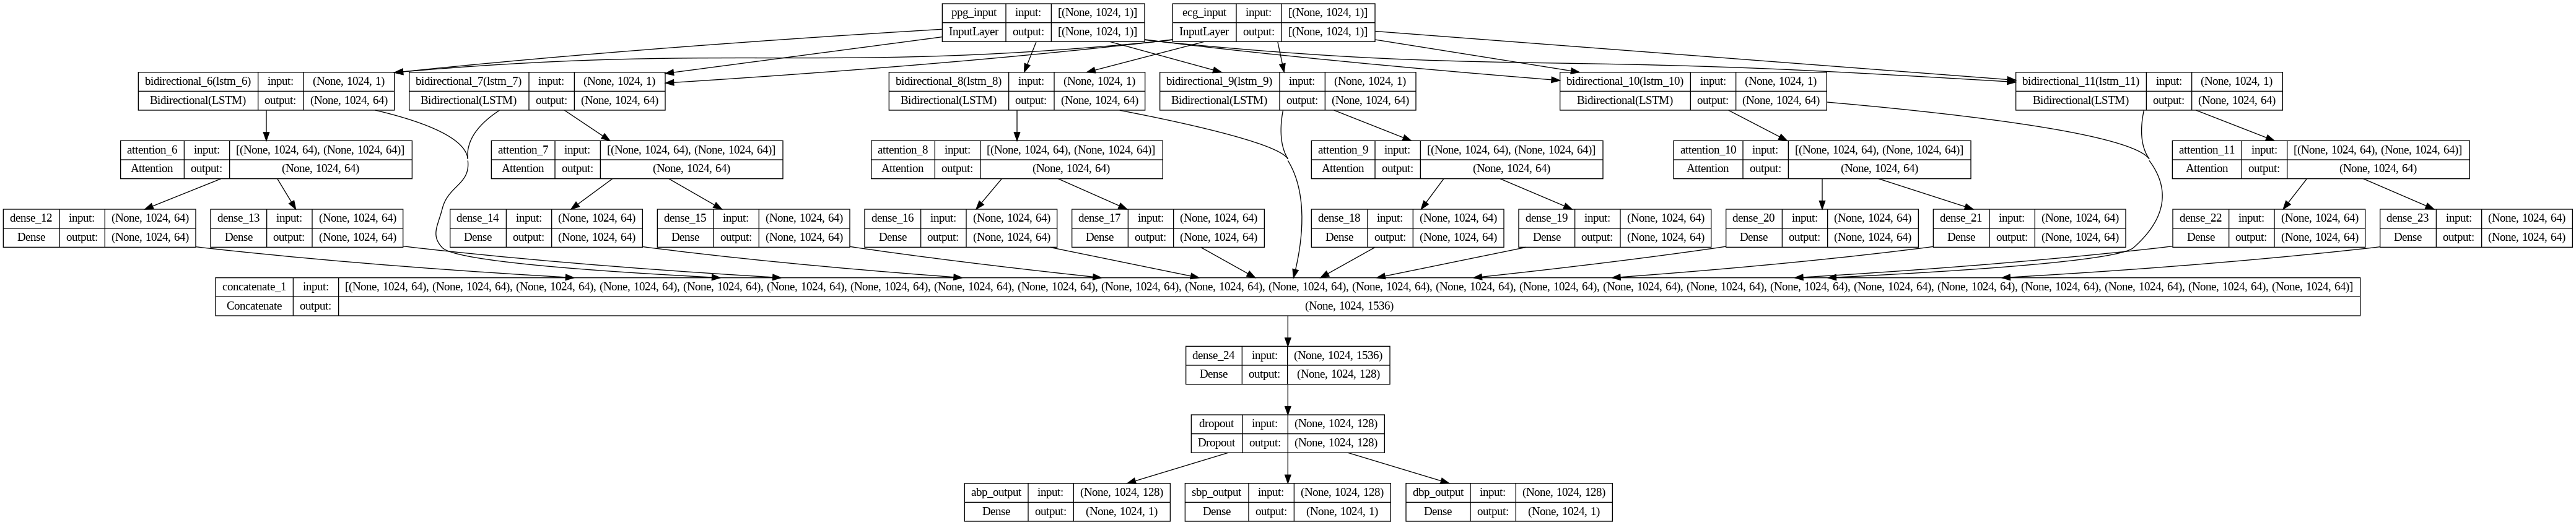

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model and print losses using the custom callback
history = model.fit(
    [X_ppg_train, X_ecg_train],
    [y_abp_train, y_sbp_train, y_dbp_train],
    validation_data=([X_ppg_val, X_ecg_val], [y_abp_val, y_sbp_val, y_dbp_val]),
    epochs=10,
    batch_size=32,
    callbacks=[loss_callback]  # Add the custom callback for printing losses
)
# Evaluate the model on the test data
loss, abp_loss, sbp_loss, dbp_loss, abp_mae, sbp_mae, dbp_mae = model.evaluate([X_ppg_test, X_ecg_test], [y_abp_test, y_sbp_test, y_dbp_test], verbose=2)
print(f"Total Loss: {loss}")
print(f"ABP Loss: {abp_loss}")
print(f"SBP Loss: {sbp_loss}")
print(f"DBP Loss: {dbp_loss}")
print(f"ABP MAE: {abp_mae}")
print(f"SBP MAE: {sbp_mae}")
print(f"DBP MAE: {dbp_mae}")

Epoch 1/10
25/25 [==============================] - 629s 23s/step - loss: 17636.0195 - abp_output_loss: 4.9801 - sbp_output_loss: 14575.3301 - dbp_output_loss: 3055.7063 - abp_output_mae: 1.3006 - sbp_output_mae: 119.4094 - dbp_output_mae: 53.8428 - val_loss: 8252.9502 - val_abp_output_loss: 0.4663 - val_sbp_output_loss: 7314.1392 - val_dbp_output_loss: 938.3445 - val_abp_output_mae: 0.5532 - val_sbp_output_mae: 83.0561 - val_dbp_output_mae: 27.1526
Epoch 2/10
25/25 [==============================] - 559s 22s/step - loss: 2614.6191 - abp_output_loss: 132.5829 - sbp_output_loss: 1815.6235 - dbp_output_loss: 666.4125 - abp_output_mae: 8.9220 - sbp_output_mae: 32.7887 - dbp_output_mae: 20.6590 - val_loss: 648.6773 - val_abp_output_loss: 0.3412 - val_sbp_output_loss: 389.7249 - val_dbp_output_loss: 258.6112 - val_abp_output_mae: 0.4994 - val_sbp_output_mae: 16.4951 - val_dbp_output_mae: 14.9929
Epoch 3/10
25/25 [==============================] - 580s 23s/step - loss: 873.2361 - abp_output_

In [ ]:
abp_pred, sbp_pred, dbp_pred = model.predict([X_ppg_test, X_ecg_test])

4/4 [==============================] - 32s 5s/step


In [ ]:
abp_std = np.std(abp_pred)
sbp_std = np.std(sbp_pred)
dbp_std = np.std(dbp_pred)

In [ ]:
print(f"ABP std: {abp_std}")
print(f"SBP std: {sbp_std}")
print(f"DBP std: {dbp_std}")

ABP std: 0.01854565739631653
SBP std: 7.484137535095215
DBP std: 5.702426433563232


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 ppg_input (InputLayer)      [(None, 1024, 1)]            0         []                            
                                                                                                  
 ecg_input (InputLayer)      [(None, 1024, 1)]            0         []                            
                                                                                                  
 bidirectional (Bidirection  (None, 1024, 64)             8704      ['ppg_input[0][0]',           
 al)                                                                 'ecg_input[0][0]']           
                                                                                                  
 bidirectional_1 (Bidirecti  (None, 1024, 64)             8704      ['ppg_input[0][0]',       

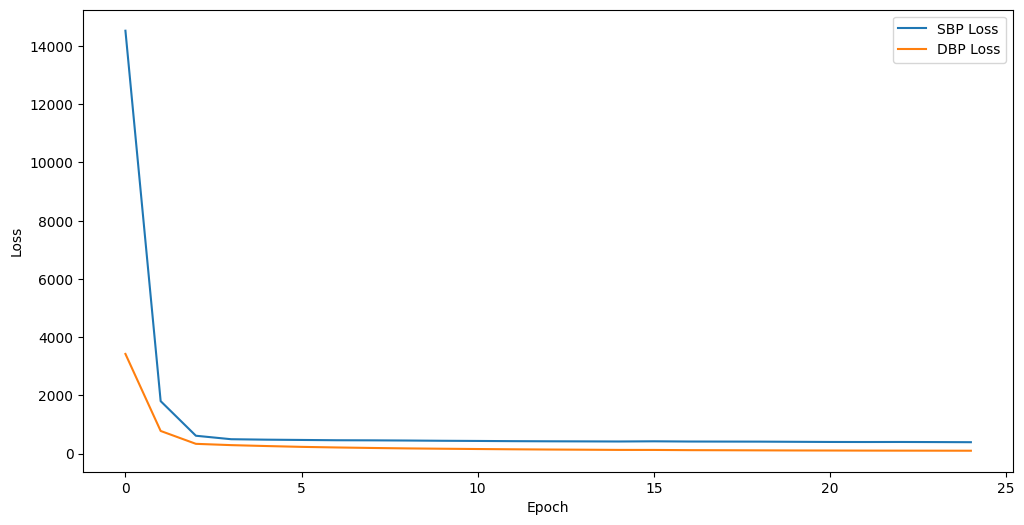

In [ ]:
# Visualize the training history
plt.figure(figsize=(12, 6))
#plt.plot(history.history['abp_output_loss'], label='ABP Loss')
plt.plot(history.history['sbp_output_loss'], label='SBP Loss')
plt.plot(history.history['dbp_output_loss'], label='DBP Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Model - 2 Average

import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Attention, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback

# Define a custom callback to print losses during training
class LossCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1} - Total Loss: {logs['loss']:.4f}, ABP Loss: {logs['abp_output_loss']:.4f}, SBP Loss: {logs['sbp_output_loss']:.4f}, DBP Loss: {logs['dbp_output_loss']:.4f}")

# Define the input shapes for PPG and ECG data
ppg_input = Input(shape=(1024, 1), name="ppg_input")
ecg_input = Input(shape=(1024, 1), name="ecg_input")

# Define LSTM layers for PPG and ECG data with multiple layers
ppg_lstm = Bidirectional(LSTM(128, return_sequences=True))(ppg_input)
ecg_lstm = Bidirectional(LSTM(128, return_sequences=True))(ecg_input)

# Apply attention mechanisms to both PPG and ECG data
ppg_attention = Attention()([ppg_lstm, ecg_lstm])
ecg_attention = Attention()([ecg_lstm, ppg_lstm])

# Define LSTM layers for PPG and ECG data with multiple layers
ppg_lstm = Bidirectional(LSTM(64, return_sequences=True))(ppg_input)
ecg_lstm = Bidirectional(LSTM(64, return_sequences=True))(ecg_input)

# Apply attention mechanisms to both PPG and ECG data
ppg_attention = Attention()([ppg_lstm, ecg_lstm])
ecg_attention = Attention()([ecg_lstm, ppg_lstm])

# Additional LSTM layers
ppg_lstm = Bidirectional(LSTM(32, return_sequences=True))(ppg_attention)
ecg_lstm = Bidirectional(LSTM(32, return_sequences=True))(ecg_attention)

# Apply attention mechanisms again
ppg_attention = Attention()([ppg_lstm, ecg_lstm])
ecg_attention = Attention()([ecg_lstm, ppg_lstm])

# Additional LSTM layers
ppg_lstm = Bidirectional(LSTM(16, return_sequences=True))(ppg_attention)
ecg_lstm = Bidirectional(LSTM(16, return_sequences=True))(ecg_attention)

# Apply attention mechanisms again
ppg_attention = Attention()([ppg_lstm, ecg_lstm])
ecg_attention = Attention()([ecg_lstm, ppg_lstm])

# Define LSTM layers for PPG and ECG data with multiple layers
ppg_lstm = Bidirectional(LSTM(128, return_sequences=True))(ppg_input)
ecg_lstm = Bidirectional(LSTM(128, return_sequences=True))(ecg_input)

# Apply attention mechanisms to both PPG and ECG data
ppg_attention = Attention()([ppg_lstm, ecg_lstm])
ecg_attention = Attention()([ecg_lstm, ppg_lstm])

# Define LSTM layers for PPG and ECG data with multiple layers
ppg_lstm = Bidirectional(LSTM(64, return_sequences=True))(ppg_input)
ecg_lstm = Bidirectional(LSTM(64, return_sequences=True))(ecg_input)

# Apply attention mechanisms to both PPG and ECG data
ppg_attention = Attention()([ppg_lstm, ecg_lstm])
ecg_attention = Attention()([ecg_lstm, ppg_lstm])

# Additional LSTM layers
ppg_lstm = Bidirectional(LSTM(32, return_sequences=True))(ppg_attention)
ecg_lstm = Bidirectional(LSTM(32, return_sequences=True))(ecg_attention)

# Apply attention mechanisms again
ppg_attention = Attention()([ppg_lstm, ecg_lstm])
ecg_attention = Attention()([ecg_lstm, ppg_lstm])

# Additional LSTM layers
ppg_lstm = Bidirectional(LSTM(16, return_sequences=True))(ppg_attention)
ecg_lstm = Bidirectional(LSTM(16, return_sequences=True))(ecg_attention)

# Apply attention mechanisms again
ppg_attention = Attention()([ppg_lstm, ecg_lstm])
ecg_attention = Attention()([ecg_lstm, ppg_lstm])

# Concatenate the outputs of LSTM layers and attention layers
combined = Concatenate(axis=-1)([ppg_attention, ecg_attention])

# Add additional dense layers for improved feature extraction
combined = Dense(128, activation="relu")(combined)
combined = Dropout(0.5)(combined)

# Create an output layer for ABP prediction
abp_output = Dense(1, name="abp_output")(combined)

# Create an output layer for SBP prediction
sbp_output = Dense(1, name="sbp_output")(combined)

# Create an output layer for DBP prediction
dbp_output = Dense(1, name="dbp_output")(combined)

# Create the model
model = Model(inputs=[ppg_input, ecg_input], outputs=[abp_output, sbp_output, dbp_output])

# Compile the model with appropriate loss functions and metrics for each output
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adjust the learning rate
    loss={"abp_output": "mean_squared_error", "sbp_output": "mean_squared_error", "dbp_output": "mean_squared_error"},
    metrics={"abp_output": "mae", "sbp_output": "mae", "dbp_output": "mae"}
)

# Display the model summary
model.summary()

# Custom callback to print losses during training
loss_callback = LossCallback()



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 ppg_input (InputLayer)      [(None, 1024, 1)]            0         []                            
                                                                                                  
 ecg_input (InputLayer)      [(None, 1024, 1)]            0         []                            
                                                                                                  
 bidirectional_22 (Bidirect  (None, 1024, 128)            33792     ['ppg_input[0][0]']           
 ional)                                                                                           
                                                                                                  
 bidirectional_23 (Bidirect  (None, 1024, 128)            33792     ['ecg_input[0][0]']     

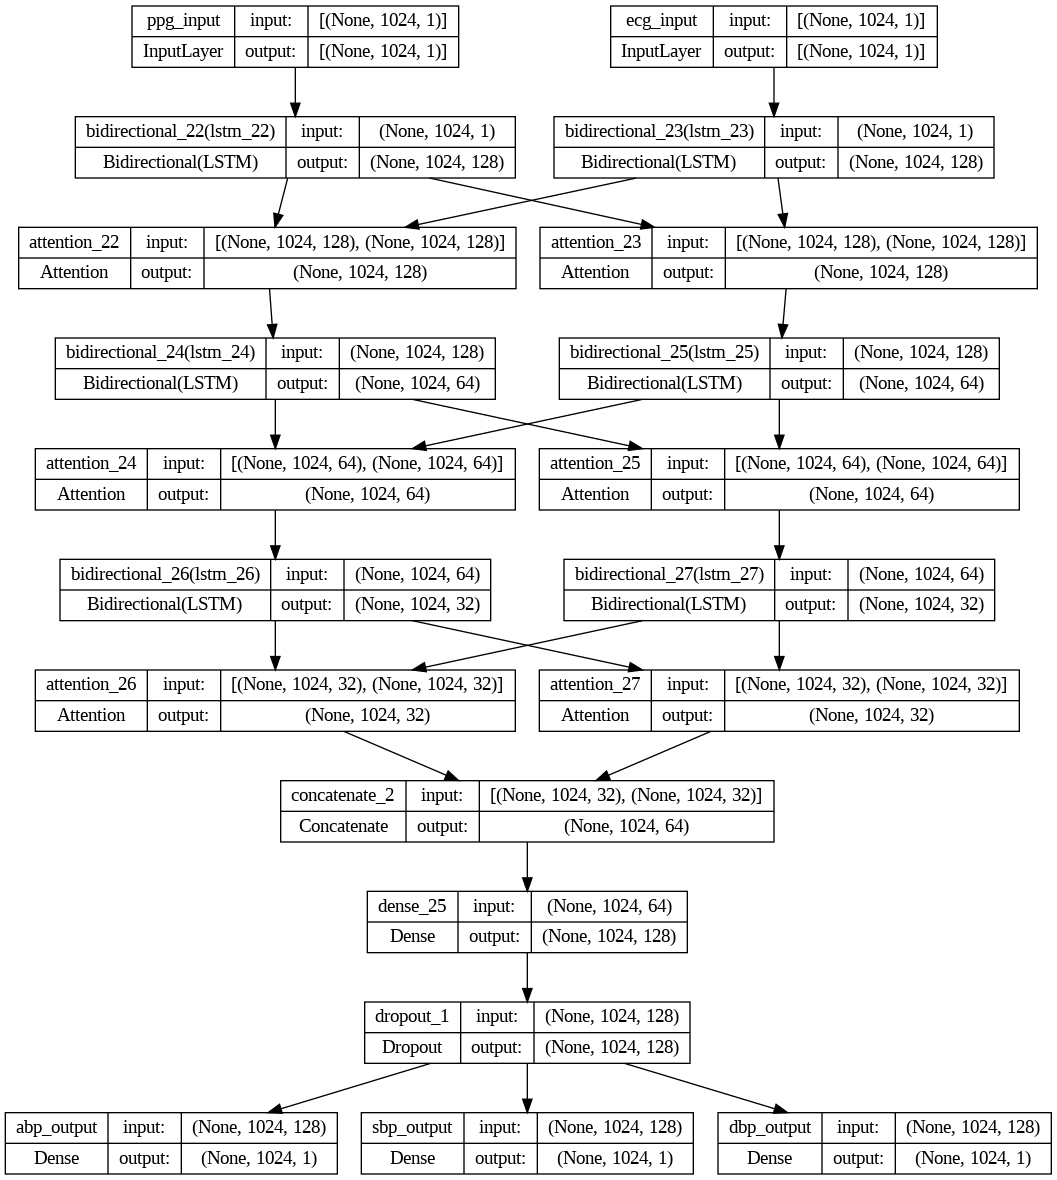

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model and print losses using the custom callback
history = model.fit(
    [X_ppg_train, X_ecg_train],
    [y_abp_train, y_sbp_train, y_dbp_train],
    validation_data=([X_ppg_val, X_ecg_val], [y_abp_val, y_sbp_val, y_dbp_val]),
    epochs=25,  # Increase the number of epochs for better convergence
    batch_size=64,  # Experiment with batch size
    callbacks=[loss_callback]  # Add the custom callback for printing losses
)

# Evaluate the model on the test data
loss, abp_loss, sbp_loss, dbp_loss, abp_mae, sbp_mae, dbp_mae = model.evaluate([X_ppg_test, X_ecg_test], [y_abp_test, y_sbp_test, y_dbp_test], verbose=2)
print(f"Total Loss: {loss}")
print(f"ABP Loss: {abp_loss}")
print(f"SBP Loss: {sbp_loss}")
print(f"DBP Loss: {dbp_loss}")
print(f"ABP MAE: {abp_mae}")
print(f"SBP MAE: {sbp_mae}")
print(f"DBP MAE: {dbp_mae}")


Epoch 1/25
13/13 [==============================] - 331s 23s/step - loss: 20484.7734 - abp_output_loss: 0.1610 - sbp_output_loss: 16755.7812 - dbp_output_loss: 3728.8313 - abp_output_mae: 0.3249 - sbp_output_mae: 128.9301 - dbp_output_mae: 60.5596 - val_loss: 19736.0020 - val_abp_output_loss: 0.1994 - val_sbp_output_loss: 16227.2588 - val_dbp_output_loss: 3508.5437 - val_abp_output_mae: 0.3333 - val_sbp_output_mae: 126.8569 - val_dbp_output_mae: 58.7537
Epoch 2/25
13/13 [==============================] - 297s 23s/step - loss: 19249.7227 - abp_output_loss: 0.8298 - sbp_output_loss: 15700.4961 - dbp_output_loss: 3548.3953 - abp_output_mae: 0.7247 - sbp_output_mae: 124.7223 - dbp_output_mae: 59.0260 - val_loss: 17833.9395 - val_abp_output_loss: 0.1441 - val_sbp_output_loss: 14631.5576 - val_dbp_output_loss: 3202.2368 - val_abp_output_mae: 0.3475 - val_sbp_output_mae: 120.3748 - val_dbp_output_mae: 56.0895
Epoch 3/25
13/13 [==============================] - 325s 25s/step - loss: 16601.4688

In [ ]:
abp_pred, sbp_pred, dbp_pred = model.predict([X_ppg_test, X_ecg_test])

4/4 [==============================] - 22s 3s/step


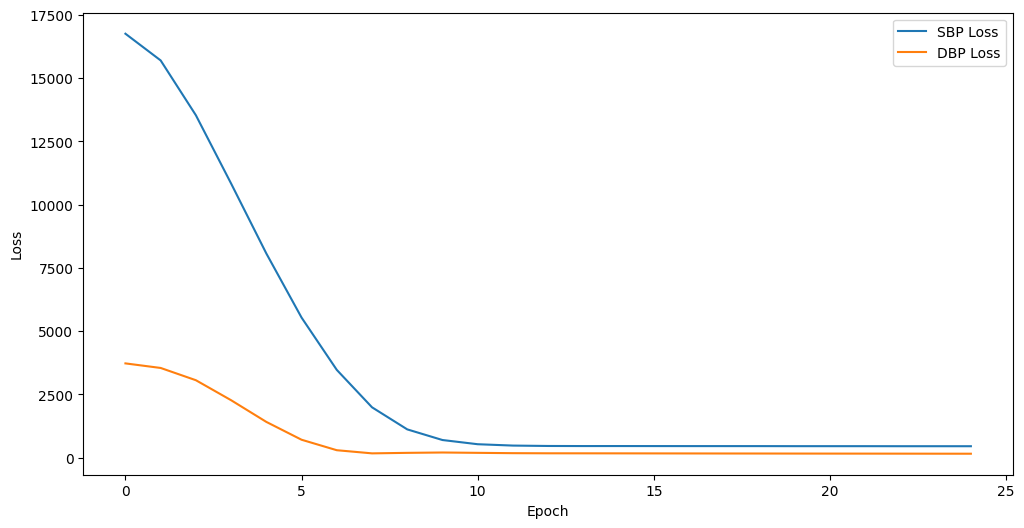

In [ ]:
# Visualize the training history
plt.figure(figsize=(12, 6))
#plt.plot(history.history['abp_output_loss'], label='ABP Loss')
plt.plot(history.history['sbp_output_loss'], label='SBP Loss')
plt.plot(history.history['dbp_output_loss'], label='DBP Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 ppg_input (InputLayer)      [(None, 1024, 1)]            0         []                            
                                                                                                  
 ecg_input (InputLayer)      [(None, 1024, 1)]            0         []                            
                                                                                                  
 bidirectional_28 (Bidirect  (None, 1024, 128)            33792     ['ppg_input[0][0]']           
 ional)                                                                                           
                                                                                                  
 bidirectional_29 (Bidirect  (None, 1024, 128)            33792     ['ecg_input[0][0]']     

In [ ]:
# Model - 3 (Best output)

import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Attention, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback

# Define a custom callback to print losses during training
class LossCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1} - Total Loss: {logs['loss']:.4f}, ABP Loss: {logs['abp_output_loss']:.4f}, SBP Loss: {logs['sbp_output_loss']:.4f}, DBP Loss: {logs['dbp_output_loss']:.4f}")

# Define the input shapes for PPG and ECG data
ppg_input = Input(shape=(1024, 1), name="ppg_input")
ecg_input = Input(shape=(1024, 1), name="ecg_input")

# Initialize a list to hold LSTM and Attention layers
layers = []

# Create 6 pairs of Bi-directional LSTM and Attention layers with additional dense layers
for _ in range(6):
    # Bi-directional LSTM layer
    lstm = Bidirectional(LSTM(32, return_sequences=True))
    ppg_lstm = lstm(ppg_input)
    ecg_lstm = lstm(ecg_input)

    # Attention layer
    attention = Attention()
    ppg_attention = attention([ppg_lstm, ecg_lstm])
    ecg_attention = attention([ecg_lstm, ppg_lstm])

    # Additional dense layers for improved feature extraction
    ppg_attention = Dense(64, activation="relu")(ppg_attention)
    ecg_attention = Dense(64, activation="relu")(ecg_attention)

    # Append the layers to the list
    layers.extend([ppg_lstm, ecg_lstm, ppg_attention, ecg_attention])

# Concatenate the outputs of all LSTM and Attention layers
combined = Concatenate(axis=-1)(layers)

# Add more dense layers for further feature extraction
#combined = Dense(128, activation="relu")(combined)
#combined = Dropout(0.5)(combined)

# Create an output layer for ABP prediction
abp_output = Dense(1, name="abp_output")(combined)

# Create an output layer for SBP prediction
sbp_output = Dense(1, name="sbp_output")(combined)

# Create an output layer for DBP prediction
dbp_output = Dense(1, name="dbp_output")(combined)

# Create the model
model = Model(inputs=[ppg_input, ecg_input], outputs=[abp_output, sbp_output, dbp_output])

# Compile the model with appropriate loss functions and metrics for each output
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={"abp_output": "mean_squared_error", "sbp_output": "mean_squared_error", "dbp_output": "mean_squared_error"},
    metrics={"abp_output": "mae", "sbp_output": "mae", "dbp_output": "mae"}
)


# Custom callback to print losses during training
loss_callback = LossCallback()




In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

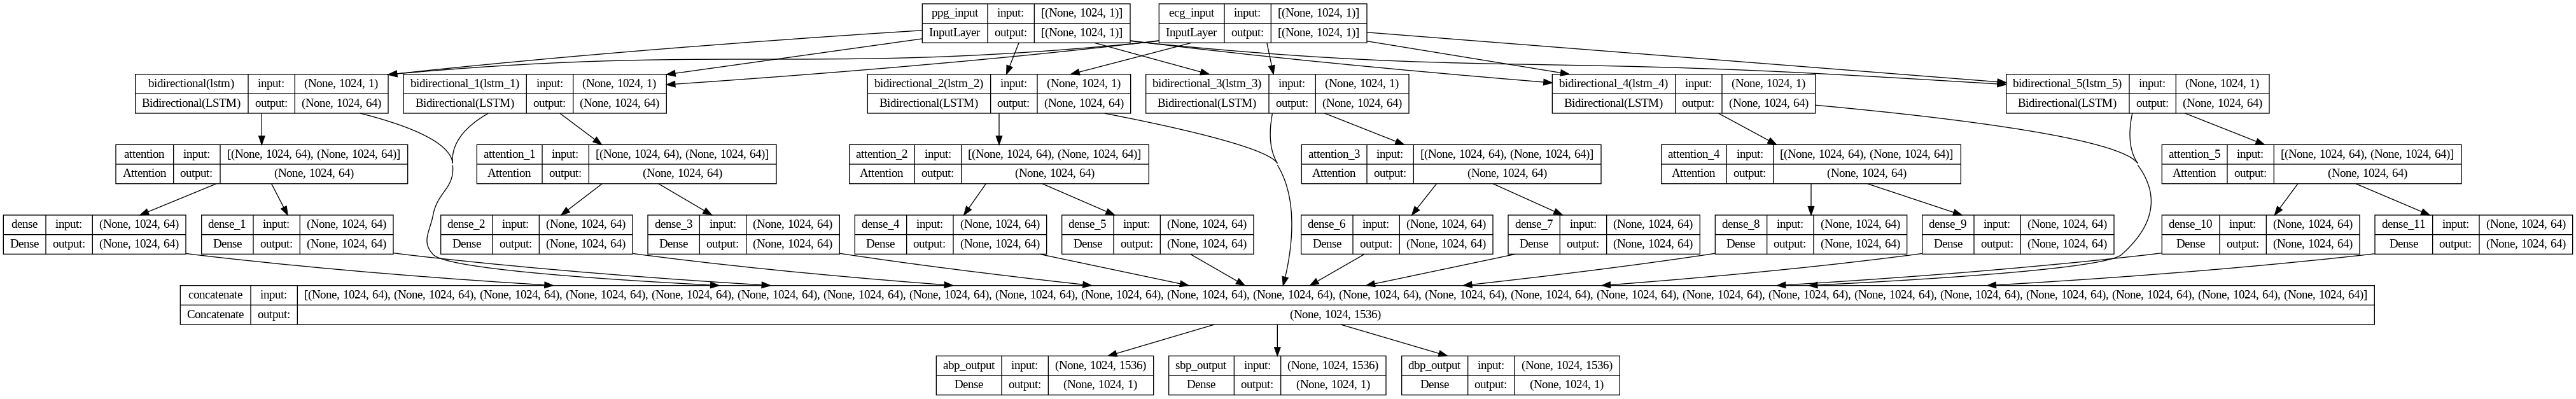

In [ ]:

# Plot the model architecture
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model and print losses using the custom callback
history = model.fit(
    [X_ppg_train, X_ecg_train],
    [y_abp_train, y_sbp_train, y_dbp_train],
    validation_data=([X_ppg_val, X_ecg_val], [y_abp_val, y_sbp_val, y_dbp_val]),
    epochs=25,
    batch_size=32,
    callbacks=[loss_callback]  # Add the custom callback for printing losses
)
abp_pred, sbp_pred, dbp_pred = model.predict([X_ppg_test, X_ecg_test])


Epoch 1/25
25/25 [==============================] - 706s 26s/step - loss: 19782.1387 - abp_output_loss: 0.0891 - sbp_output_loss: 16231.4385 - dbp_output_loss: 3550.6125 - abp_output_mae: 0.2343 - sbp_output_mae: 126.8452 - dbp_output_mae: 59.0394 - val_loss: 17296.3535 - val_abp_output_loss: 0.0315 - val_sbp_output_loss: 14459.0439 - val_dbp_output_loss: 2837.2783 - val_abp_output_mae: 0.1418 - val_sbp_output_mae: 119.6308 - val_dbp_output_mae: 52.6779
Epoch 2/25
25/25 [==============================] - 638s 26s/step - loss: 10389.7617 - abp_output_loss: 0.5442 - sbp_output_loss: 9070.5098 - dbp_output_loss: 1318.7062 - abp_output_mae: 0.5714 - sbp_output_mae: 91.9062 - dbp_output_mae: 31.5619 - val_loss: 2275.9316 - val_abp_output_loss: 0.0257 - val_sbp_output_loss: 2141.5051 - val_dbp_output_loss: 134.4007 - val_abp_output_mae: 0.1325 - val_sbp_output_mae: 44.6388 - val_dbp_output_mae: 9.9792
Epoch 3/25
25/25 [==============================] - 642s 26s/step - loss: 796.9125 - abp_ou

In [ ]:
# Calculate the standard deviation for each set of predictions
abp_std = np.std(abp_pred)
sbp_std = np.std(sbp_pred)
dbp_std = np.std(dbp_pred)
# Evaluate the model on the test data
loss, abp_loss, sbp_loss, dbp_loss, abp_mae, sbp_mae, dbp_mae = model.evaluate([X_ppg_test, X_ecg_test], [y_abp_test, y_sbp_test, y_dbp_test], verbose=2)
print(f"Total Loss: {loss}")
print(f"ABP Loss: {abp_loss}")
print(f"SBP Loss: {sbp_loss}")
print(f"DBP Loss: {dbp_loss}")
print(f"ABP MAE: {abp_mae}")
print(f"SBP MAE: {sbp_mae}")
print(f"DBP MAE: {dbp_mae}")
print(f"ABP Standard Deviation: {abp_std}")
print(f"SBP Standard Deviation: {sbp_std}")
print(f"DBP Standard Deviation: {dbp_std}")

4/4 - 41s - loss: 103.3138 - abp_output_loss: 0.0153 - sbp_output_loss: 84.6029 - dbp_output_loss: 18.6957 - abp_output_mae: 0.0956 - sbp_output_mae: 7.2569 - dbp_output_mae: 2.9217 - 41s/epoch - 10s/step
Total Loss: 103.31378936767578
ABP Loss: 0.015280148945748806
SBP Loss: 84.60285186767578
DBP Loss: 18.695663452148438
ABP MAE: 0.09560693800449371
SBP MAE: 7.2569098472595215
DBP MAE: 2.9217488765716553
ABP Standard Deviation: 0.09107272326946259
SBP Standard Deviation: 6.689927101135254
DBP Standard Deviation: 5.95544958114624


In [ ]:
sbp_pred_shape = sbp_pred.shape
y_sbp_test_shape = y_sbp_test.shape

print("Shape of sbp_pred:", sbp_pred_shape)
print("Shape of y_sbp_test:", y_sbp_test_shape)


In [ ]:
# Display the model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 ppg_input (InputLayer)      [(None, 1024, 1)]            0         []                            
                                                                                                  
 ecg_input (InputLayer)      [(None, 1024, 1)]            0         []                            
                                                                                                  
 bidirectional_6 (Bidirecti  (None, 1024, 64)             8704      ['ppg_input[0][0]',           
 onal)                                                               'ecg_input[0][0]']           
                                                                                                  
 bidirectional_7 (Bidirecti  (None, 1024, 64)             8704      ['ppg_input[0][0]',     